In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Linear Regression

Creating a regression dataset

In [2]:
x_np, y_np = datasets.make_regression(
                n_samples=100,
                n_features=1,
                noise=20,
                random_state=1)

Conversion to tensors

In [4]:
x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32)).view(y_np.shape[0],1)

In [5]:
print(x.shape, y.shape)

torch.Size([100, 1]) torch.Size([100, 1])


In [6]:
n_samples, n_features = x.shape

Defining the model

In [22]:
model = nn.Linear(in_features=n_features,
                 out_features=n_features)

In [23]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [24]:
num_epochs = 100

Training loop

In [25]:
for epoch in range(num_epochs):
    y_pred = model(x)
    l = loss(y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch % 10 == 0):
        print(f"epoch:\t{epoch}, loss:\t{l.item():.4f}")
        
pred = model(x).detach().numpy()

epoch:	0, loss:	5705.0293
epoch:	10, loss:	5535.2886
epoch:	20, loss:	5370.9644
epoch:	30, loss:	5211.8809
epoch:	40, loss:	5057.8696
epoch:	50, loss:	4908.7671
epoch:	60, loss:	4764.4150
epoch:	70, loss:	4624.6592
epoch:	80, loss:	4489.3535
epoch:	90, loss:	4358.3525


In [26]:
%matplotlib inline

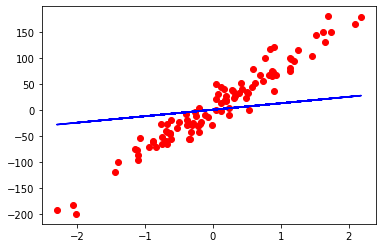

In [28]:
plt.plot(x_np,y_np, 'ro')
plt.plot(x_np, pred, 'b')
plt.show()

### Logistic Regression

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
bc = datasets.load_breast_cancer()
x_np, y_np = bc.data, bc.target

In [36]:
n_samples, n_features = x_np.shape

In [37]:
type(x_np)

numpy.ndarray

#### Data Preparation

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np,
                                                   test_size=0.2,
                                                   random_state=32)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view((y_train.shape[0], 1))
y_test = y_test.view((y_test.shape[0], 1))
print(y_train.shape)

torch.Size([455, 1])


In [51]:
class LogisticRegression(nn.Module):
    
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [54]:
model = LogisticRegression(n_features)
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-1)
num_epochs = 500

In [57]:
for epoch in range(num_epochs):
    y_pred = model(x_train)
    l = loss(y_pred, y_train)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch % 10 == 0):
        print(f"epoch:\t{epoch}, loss:\t{l.item():.8f}")
        # w,b = model.parameters()
        # print(w)
        
with torch.no_grad():
    y_pred = model(x_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {acc:.4f}")
w,b = model.parameters()
print(w)
    

epoch:	0, loss:	0.07020167
epoch:	10, loss:	0.06994192
epoch:	20, loss:	0.06968925
epoch:	30, loss:	0.06944331
epoch:	40, loss:	0.06920374
epoch:	50, loss:	0.06897031
epoch:	60, loss:	0.06874269
epoch:	70, loss:	0.06852064
epoch:	80, loss:	0.06830391
epoch:	90, loss:	0.06809228
epoch:	100, loss:	0.06788554
epoch:	110, loss:	0.06768347
epoch:	120, loss:	0.06748588
epoch:	130, loss:	0.06729262
epoch:	140, loss:	0.06710349
epoch:	150, loss:	0.06691834
epoch:	160, loss:	0.06673703
epoch:	170, loss:	0.06655940
epoch:	180, loss:	0.06638531
epoch:	190, loss:	0.06621464
epoch:	200, loss:	0.06604729
epoch:	210, loss:	0.06588309
epoch:	220, loss:	0.06572198
epoch:	230, loss:	0.06556386
epoch:	240, loss:	0.06540857
epoch:	250, loss:	0.06525610
epoch:	260, loss:	0.06510630
epoch:	270, loss:	0.06495907
epoch:	280, loss:	0.06481438
epoch:	290, loss:	0.06467215
epoch:	300, loss:	0.06453225
epoch:	310, loss:	0.06439464
epoch:	320, loss:	0.06425928
epoch:	330, loss:	0.06412607
epoch:	340, loss:	0.06399